# 一、简介
# K均值聚类算法是一种常用的聚类算法，其原理是先随机选取K个对象作为初始的聚类中心，然后将每个对象分配给距离其最近的聚类中心，
# 接着更新聚类中心，重复这个过程直到满足终止条件。终止条件可以是没有（或最小数目）对象被重新分配给不同的聚类，没有（或最小数目）
# 聚类中心再发生变化，误差平方和局部最小。

In [1]:
# 二、创建一个明显分为2类的例子
import numpy as np

In [2]:
# 生成两类数据，每类包含10个样本，共20个样本，每个样本有两个特征
c1x = np.random.uniform(0.5, 1.5, (1, 10))
c1y = np.random.uniform(0.5, 1.5, (1, 10))
c2x = np.random.uniform(3.5, 4.5, (1, 10))
c2y = np.random.uniform(3.5, 4.5, (1, 10))
x = np.hstack((c1x, c2x))
y = np.hstack((c1y, c2y))
X = np.vstack((x, y)).T  # 构建特征矩阵，每行代表一个样本，每列代表一个特征

In [3]:
print("生成的数据：")
print(X)

生成的数据：
[[1.09856988 1.34364045]
 [0.90119778 1.16905289]
 [1.48410167 1.43059602]
 [1.3663572  0.72603047]
 [0.60664635 1.37488388]
 [1.1156393  0.53972749]
 [0.50183152 1.31628665]
 [0.8818412  1.41432733]
 [0.8856774  1.07778327]
 [1.13245668 0.67974648]
 [4.04506701 4.07117377]
 [3.83136747 3.56264204]
 [3.65519653 3.90490783]
 [3.70340412 4.18775457]
 [4.28933931 4.11056782]
 [4.10237717 3.56123171]
 [4.05921493 3.65186896]
 [4.07792174 4.26388551]
 [3.90977283 4.35307147]
 [4.21491727 4.44829838]]


In [4]:
# 引入必要的库
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [5]:
# 使用K均值算法进行聚类，设置聚类簇数为2
kmeans = KMeans(n_clusters=2)
result = kmeans.fit_predict(X)  # 训练并预测

E:\anaconda\envs\sdsd_torch\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
E:\anaconda\envs\sdsd_torch\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [8]:
print("分类结果：")
print(result)

分类结果：
[1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]


In [9]:
# 设置中文字体为SimHei
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']

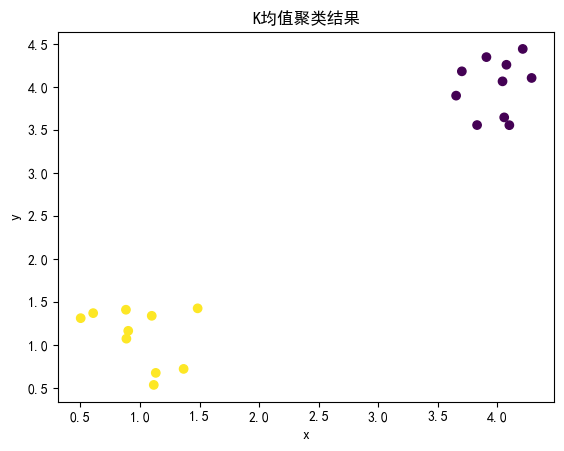

In [10]:
# 可视化聚类结果
plt.scatter(X[:, 0], X[:, 1], c=result, marker='o')
plt.xlabel('x')
plt.ylabel('y')
plt.title('K均值聚类结果')
plt.show()

# 三、实例分析（对某网站500家饭店价格及评论进行聚类）

In [11]:
import pandas as pd

In [12]:
# 从Excel文件中读取数据
data = pd.read_excel('data.xlsx', header=0).iloc[:501, 3:5]  # 读取前501行的第4、5列数据
per_25 = data.describe().iloc[4, 1]  # 计算价格列的第25百分位数
per_75 = data.describe().iloc[6, 1]  # 计算价格列的第75百分位数
data = data[(data.iloc[:, 1] >= per_25) & (data.iloc[:, 1] <= per_75)]  # 选择价格在四分位数之间的数据
X = np.array(data)

FileNotFoundError: [Errno 2] No such file or directory: 'data.xlsx'

In [14]:
# 使用肘部法选择最优的K值
K = range(1, 10)
mean_dispersions = []
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    mean_dispersions.append(sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

E:\anaconda\envs\sdsd_torch\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
E:\anaconda\envs\sdsd_torch\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


NameError: name 'cdist' is not defined

ValueError: x and y must have same first dimension, but have shapes (9,) and (0,)

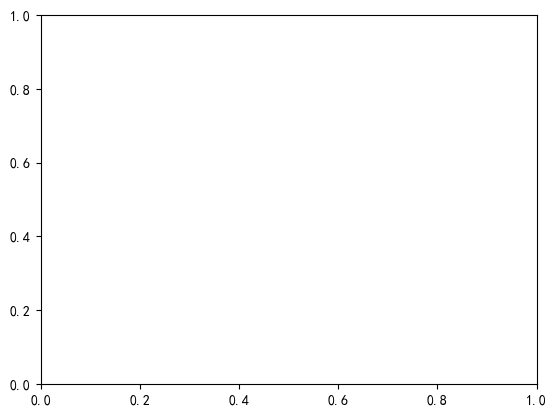

In [15]:
# 绘制K值与平均离差之间的关系图
plt.plot(K, mean_dispersions, 'bx-')
plt.xlabel('k')
plt.ylabel('平均离差')
plt.title('用肘部方法选择K值')
plt.show()

In [16]:
# 选择最优的K值进行聚类
optimal_k = 3  # 根据肘部法选择的最优K值
kmeans = KMeans(n_clusters=optimal_k)
result = kmeans.fit_predict(X)  # 训练并预测

E:\anaconda\envs\sdsd_torch\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
E:\anaconda\envs\sdsd_torch\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


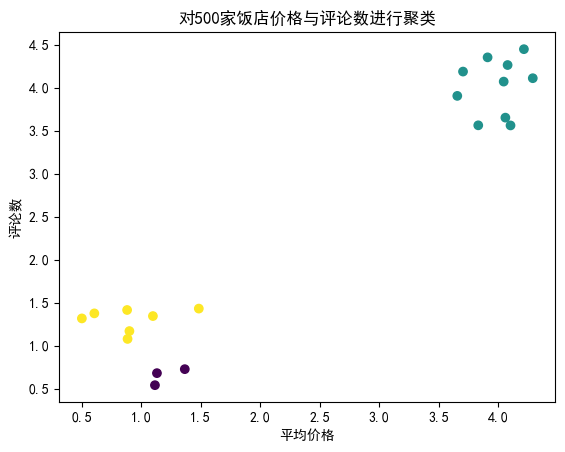

In [17]:
# 可视化聚类结果
plt.scatter(X[:, 0], X[:, 1], c=result, marker='o')
plt.xlabel('平均价格')
plt.ylabel('评论数')
plt.title('对500家饭店价格与评论数进行聚类')
plt.show()

In [18]:
print("聚类结果：")
print(result)

聚类结果：
[2 2 2 0 2 0 2 2 2 0 1 1 1 1 1 1 1 1 1 1]
